# Movie Analysis for Microsoft 
The purpose of this project is to analyze the movies data sets to produce 3 important recommendation to help jump start microsoft stepping in the movie industry. Our findings will include: how, where and what to start with. Let's dive in! 

Here's an outline of the project:

- Import the dataset
- Understand the dataset
- Clean the dataset 
- Visualize the dataset
- Recommendations  

## 1. Import the Dataset

Steps:

- Install required libraries
- Import the libraries
- Import the dataset 
We use data sets from containting information on movies released between 2010-2019. 

### Install Required Libraries

In [1]:
!pip install pandas numpy --quiet

In [2]:
import pandas as pd
import sqlite3
pd.options.display.float_format = '{:.2f}'.format 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### Importing the Dataset 

In [3]:
# We have original_language	original_title	popularity	release_date	title	vote_average	vote_count and year of the movie.
movie_info = pd.read_csv('zippedData/tmdb.movies.csv.gz',parse_dates=['release_date'])
genre_info = pd.read_csv('abc.csv')
bom_info=pd.read_csv('zippedData/bom.movie_gross.csv.gz')


## Understand the dataset

In [4]:
#Print the dataset representing number of columns
movie_info.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610


In [5]:
# No of columns in the dataset 
print(movie_info.columns)

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [6]:
movie_info=movie_info[['genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count']]

In [7]:
### Checking No of rows and columns in the dataset .
movie_info.shape 

(26517, 9)

In [8]:
#drop null values in the dataset
movie_info.dropna(inplace=True)

In [9]:
#There is no null values present in the dataset.
movie_info.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

## Clean the dataset
We dropped missing values, converted data types, and merged the two data sets on production studio column. 

In [10]:
# Drop Duplicates values 
movie_info.drop_duplicates(keep='first', inplace=True)

In [11]:
# Check os theres any duplicate values in the dataset.
movie=movie_info.duplicated().any()
print("Are there any duplicated values in movies  data :", movie)

Are there any duplicated values in movies  data : False


In [12]:
# There is no outlier Present in the dataset .
movie_info.describe()

,id,popularity,vote_average,vote_count
count,25497.00,25497.00,25497.00,25497.00
mean,294203.96,3.04,5.98,178.80
std,154690.25,4.26,1.87,914.15
min,27.00,0.60,0.00,1.00
25%,154770.00,0.60,5.00,1.00
50%,307125.00,1.32,6.00,5.00
75%,420707.00,3.49,7.00,25.00
max,608444.00,80.77,10.00,22186.00


In [13]:
genre_info.head(2)

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"


In [14]:
#drop null values 
genre_info.dropna(inplace=True)

In [15]:
#There is no null values present in the dataset.
genre_info.isnull().sum()

Unnamed: 0         0
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [16]:
# Drop Duplicates values 
genre_info.drop_duplicates(keep='first', inplace=True)

In [17]:
# Check os theres any duplicate values in the dataset.
genre=genre_info.duplicated().any()
print("Are there any duplicated values in Genre data :", movie)

Are there any duplicated values in Genre data : False


In [18]:
genre_info.describe()

,Unnamed: 0,start_year,runtime_minutes
count,112232.00,112232.00,112232.00
mean,70083.92,2014.40,86.26
std,41038.11,2.64,167.90
min,0.00,2010.00,1.00
25%,34545.75,2012.00,70.00
50%,68336.50,2014.00,87.00
75%,104076.25,2017.00,99.00
max,146139.00,2022.00,51420.00


In [19]:
# Bom contain title , Studio , Domestic Gross , Foriegn gross , year 
print(bom_info.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [20]:
# Printing the number of columns 
bom_info.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010


In [21]:
#drop null values 
bom_info.dropna(inplace=True)

In [22]:
#There is no null values present in the dataset.
bom_info.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [23]:
# Drop Duplicates values
bom_info.drop_duplicates(keep='first', inplace=True)

In [24]:
# Check os theres any duplicate values in the dataset.
bom=bom_info.duplicated().any()
print("Are there any duplicated values in Bom data :", bom)

Are there any duplicated values in Bom data : False


- **Combining Gross Domestic and Gross Foriegn =Total Earned**

In [25]:
bom_info['foreign_gross']= [float(str(i).replace(",", "")) for i in bom_info['foreign_gross']]

bom_info['foreign_gross'] = bom_info['foreign_gross'].astype(float)


In [26]:
bom_info['Total_Earned']=bom_info['domestic_gross']+bom_info['foreign_gross']

- **Concat the dataset based on title** 

In [27]:
Concat_dataset=movie_info.merge(genre_info, left_on='original_title', right_on='primary_title')

In [28]:
Concat_dataset=Concat_dataset[['id', 'original_language',
       'popularity', 'release_date', 'vote_average', 'vote_count'
       , 'movie_id', 'primary_title',
       'start_year', 'runtime_minutes', 'genres']]

In [29]:
 Concat_dataset.head(2)

,id,original_language,popularity,release_date,vote_average,vote_count,movie_id,primary_title,start_year,runtime_minutes,genres
0,12444,en,33.53,2010-11-19,7.70,10788,tt0926084,Harry Potter and the Deathly Hallows: Part 1,2010,146.00,"Adventure,Fantasy,Mystery"
1,10191,en,28.73,2010-03-26,7.70,7610,tt0892769,How to Train Your Dragon,2010,98.00,"Action,Adventure,Animation"


In [30]:
Concat_dataset=Concat_dataset.merge(bom_info, left_on='primary_title', right_on='title')

In [31]:
Concat_dataset.head(2)

,id,original_language,popularity,release_date,vote_average,vote_count,movie_id,primary_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,Total_Earned
0,10191,en,28.73,2010-03-26,7.70,7610,tt0892769,How to Train Your Dragon,2010,98.00,"Action,Adventure,Animation",How to Train Your Dragon,P/DW,217600000.00,277300000.00,2010,494900000.00
1,10138,en,28.52,2010-05-07,6.80,12368,tt1228705,Iron Man 2,2010,124.00,"Action,Adventure,Sci-Fi",Iron Man 2,Par.,312400000.00,311500000.00,2010,623900000.00


In [32]:
Concat_dataset.columns

Index(['id', 'original_language', 'popularity', 'release_date', 'vote_average',
       'vote_count', 'movie_id', 'primary_title', 'start_year',
       'runtime_minutes', 'genres', 'title', 'studio', 'domestic_gross',
       'foreign_gross', 'year', 'Total_Earned'],
      dtype='object')

In [33]:
Average_of_Total_Earned = Concat_dataset['Total_Earned'].mean()
more_then_average=Concat_dataset.loc[Concat_dataset['Total_Earned']>Average_of_Total_Earned]

In [48]:
more_then_average[['genres']].head(5)

,genres
0,"Action,Adventure,Animation"
1,"Action,Adventure,Sci-Fi"
2,"Action,Adventure,Sci-Fi"
3,"Adventure,Animation,Comedy"
4,"Animation,Comedy,Family"


In [35]:
Concat_dataset.sort_values('Total_Earned',ascending=False).head(3)


,id,original_language,popularity,release_date,vote_average,vote_count,movie_id,primary_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,Total_Earned
1197,99861,en,44.38,2015-05-01,7.30,13457,tt2395427,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015,1405400000.00
525,86841,en,2.06,2011-01-18,5.10,11,tt1825683,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00
526,284054,en,44.14,2018-02-16,7.40,12365,tt1825683,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00


In [36]:
Concat_dataset.sort_values('runtime_minutes',ascending=False).head(3)

,id,original_language,popularity,release_date,vote_average,vote_count,movie_id,primary_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,Total_Earned
761,101173,en,8.02,2012-01-19,6.00,215,tt3313066,Coriolanus,2014,192.00,"Drama,History,War",Coriolanus,Wein.,757000.00,315000.00,2012,1072000.00
517,359926,es,0.60,2015-04-11,6.00,2,tt1403047,Aurora,2010,181.00,Drama,Aurora,CGld,5700.00,5100.00,2011,10800.00
511,81527,ro,2.21,2011-06-29,5.80,11,tt1403047,Aurora,2010,181.00,Drama,Aurora,CGld,5700.00,5100.00,2011,10800.00


## Data Visualization

#### Find genre 

In [37]:
Top_Popular_Genre_Movies = Concat_dataset.groupby(['genres'])['Total_Earned'].mean().sort_values(ascending=False).reset_index()

In [38]:
Top_Popular_Genre_Movies_5=Top_Popular_Genre_Movies.head(5)

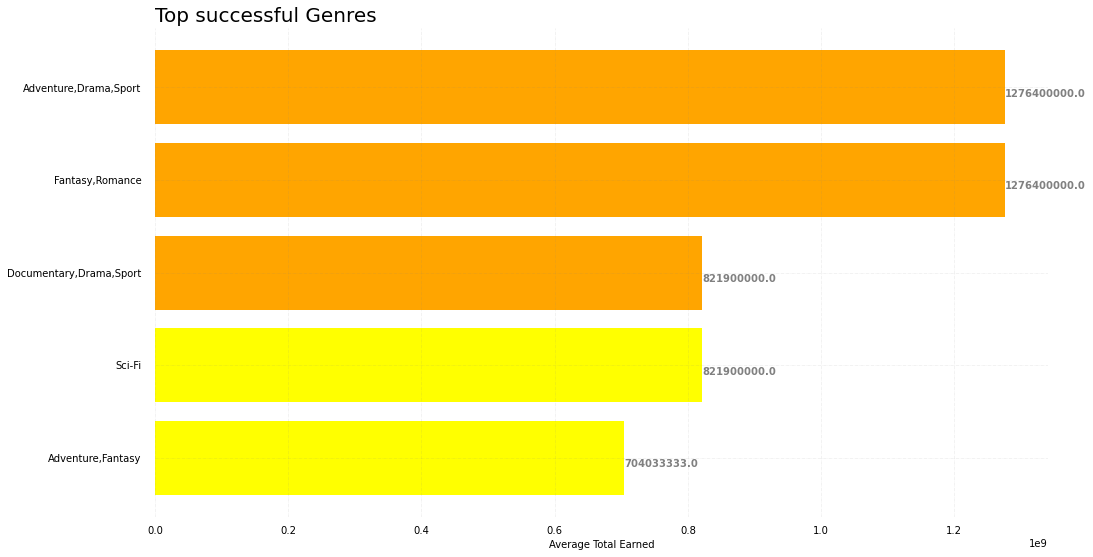

In [55]:
 
name = Top_Popular_Genre_Movies_5['genres']
price = Top_Popular_Genre_Movies_5['Total_Earned']
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
c = ['orange','orange','orange','yellow','yellow']

# Horizontal Bar Plot
ax.barh(name,price, color = c)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Top successful Genres ',
             loc ='left',fontsize=20 )
ax.set_xlabel('Average Total Earned')
 

# Show Plot
plt.show()

In [40]:
Top_Popular_Genre_Movies_5.head(5)

,genres,Total_Earned
0,"Adventure,Drama,Sport",1276400000.00
1,"Fantasy,Romance",1276400000.00
2,"Documentary,Drama,Sport",821900000.00
3,Sci-Fi,821900000.00
4,"Adventure,Fantasy",704033333.00


In [41]:
Top_Popular_Studio_Movies = Concat_dataset.groupby(['studio'])['Total_Earned'].mean().sort_values(ascending=False).reset_index()


In [42]:
Top_Popular_Studio_Movies_5=Top_Popular_Studio_Movies.head(5)

In [43]:
Top_Popular_Studio_Movies_5.head()

,studio,Total_Earned
0,BV,523832171.97
1,P/DW,507650000.00
2,GrtIndia,254200000.00
3,WB,233757415.98
4,Sony,232238271.57


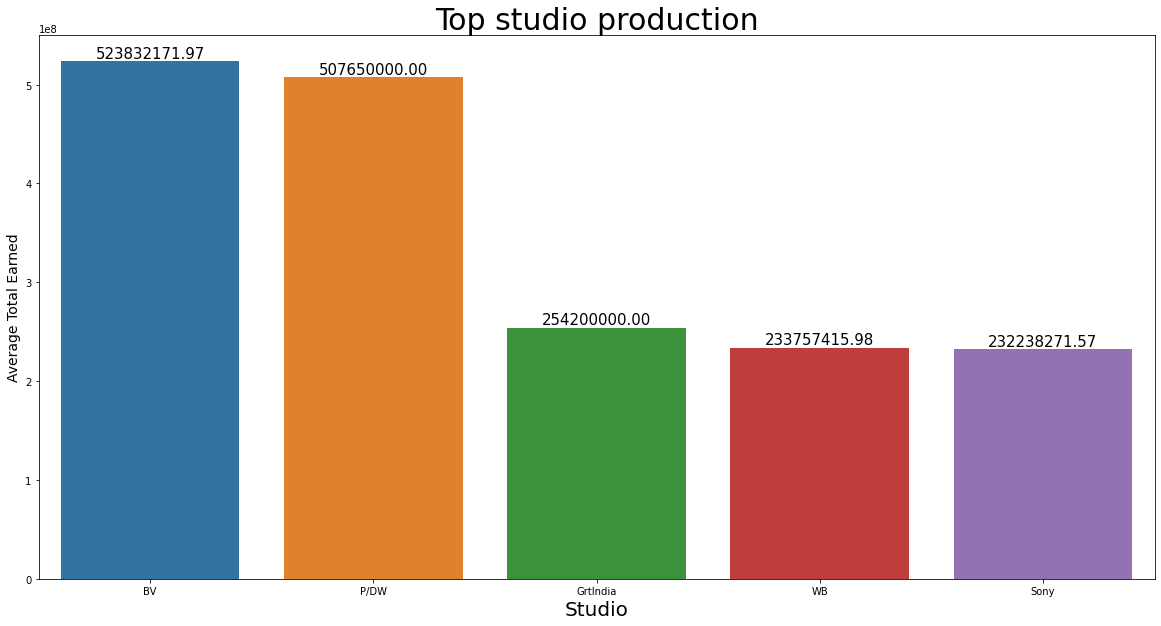

In [56]:
name = Top_Popular_Studio_Movies_5['studio']
price = Top_Popular_Studio_Movies_5['Total_Earned']
 
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the plot size
plt.figure(figsize=(20, 10))

# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="studio", y="Total_Earned", data=Top_Popular_Studio_Movies_5)

# Iterating over the bars one-by-one
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Studio", size=20)

# Setting the label for y-axis
plt.ylabel("Average Total Earned", size=14)

# Setting the title for the graph
plt.title("Top studio production",size=30)

# Finally showing the plot
plt.show()

 

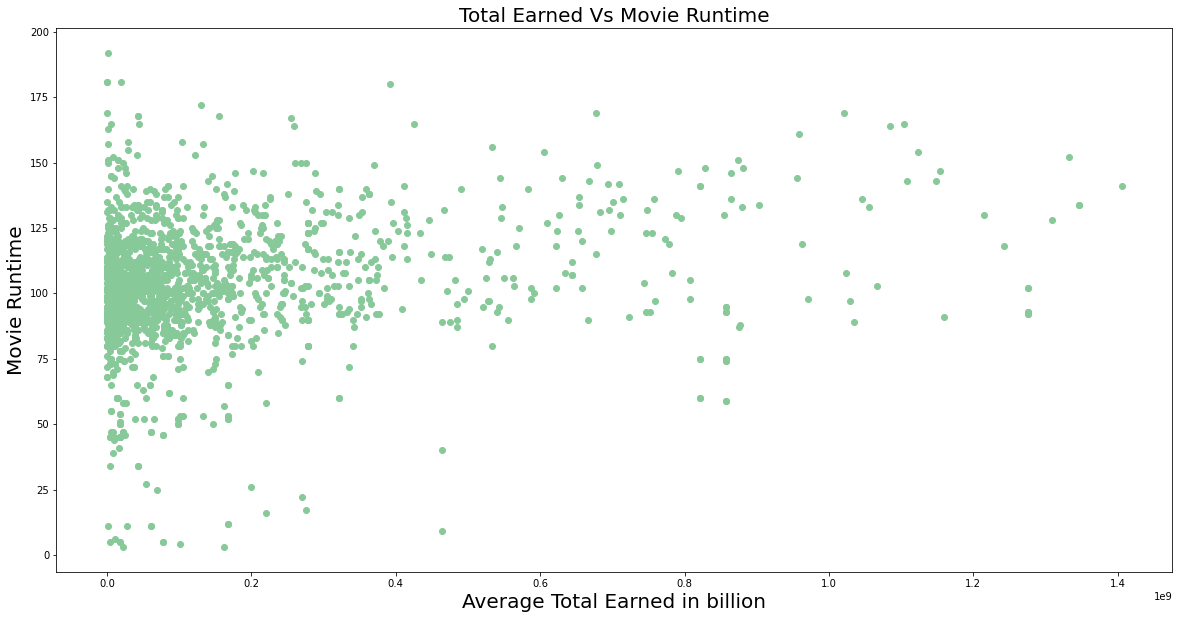

In [61]:
x = Concat_dataset['Total_Earned']
y = Concat_dataset['runtime_minutes']

plt.figure(figsize=(20,10))

plt.scatter(x, y, color = '#88c999')
plt.title("Total Earned Vs Movie Runtime",size=20)
plt.xlabel("Average Total Earned in billion",size=20)
plt.ylabel("Movie Runtime",size=20)
plt.show()


In [46]:
min(x),max(x)

(10800.0, 1405400000.0)

### Conclusion of findings


In this report, I discussed the findings of a recommendation system that I developed for a dataset of movies. To sum up, the data analysis indicates that Microsoft should prioritize fantasy romance or adventure drama sports films with a budget of less than $50 million and a running time of 100 to 150 minutes. For even higher quality, Microsoft really needs to team up with a reputable studio production business. Microsoft's chances of being successful in the film industry will be increased if they adhere to these recommendations.